In [1]:
__doc__=""" PROJECT 3: HUMANIOD ROBOTICS 

Table top object grasping using a grasping rectangle with a classfication model
i.e CNN.

Dataset used :- Cornell grasping dataset for training my model.
Dataset Description :- consisting 855 images of 244 different kind of objects,
clicked from various kinds of orientations of the object view.

pictures are tagged / lablled   corresponding to possible way to grap the object

Dataset Link :- https://drive.google.com/drive/folders/1_xPLPNAba0vAGOCZWnQVEWV1RKtRx9qV?usp=sharing"""




In [2]:
#the dataset exists in the google drive so to import the file we need to mount the google drive 
"""
!pip install google.colab

from google.colab import drive

drive.mount('/content/drive')
#while mounting use the authorization code the mount the drive, which will be given in the link.

address_dataset= "/content/drive/MyDrive/cornell  data"

"""#run the comment if you are using notebook on colab


'\n!pip install google.colab\n\nfrom google.colab import drive\n\ndrive.mount(\'/content/drive\')\n#while mounting use the authorization code the mount the drive, which will be given in the link.\n\naddress_dataset= "/content/drive/MyDrive/cornell  data"\n\n'

In [3]:
__doc__="""
Torchvision is a helpful library for study of computer vision, 
It contains datasets , model architectures and also common image transformation
for computer vision"""

#use this command if torchvision is not pre installed 

!pip install torchvision


In [4]:
#import the torchvision and other required libraries

import os #os helps to interact with Operating system /it helps by giving portability of using os dependant functions.

import torch #Torch ,its a tensor library library allows a strong GPU support to the notebook.
import torchvision
torch.manual_seed(0) #this will set the manual seed 
from torch.utils.data import Dataset #dataset allows to use pre-loaded dataset and our own dataset too.

import numpy #this module helps to deal with arrays and matrices easily.

import matplotlib.pylab  #matplotlib.pylab is a module which provide matlab type namespace in python
"""matplotlib inline function is used to render the matplot lib figures """
%matplotlib inline 

from PIL import Image #Image is used to represent PIL image
from PIL import ImageDraw #It provides 2D graphics support for images, which is used to create and retouch preexisting images and to generate graphics .


import glob #glob helps to return files paths related to specific pattern in code.

In [5]:
address_dataset = "cornell data"

In [6]:

"""this function generate_listof_grasping_rectangles function is used to generate/form a list consisting coordinates of the
rectangle used to determine the grasping area of the object ,in this list each element will be either x or y coordinate 
a particular vertex."""
def generate_listof_grasping_rectangles(name_of_file):
    
    with open(name_of_file, 'r') as file:

        list_of_coordinates = list(map(

              lambda coordinate: float(coordinate), file.read().strip().split()))

    return list_of_coordinates





"""generate_list_images function is used to generate/form a list consisting  of the images of cornell dataset """
def generate_list_of_images():
    #the dataset contains 10 diffrent directories ranging from 1 to 10 
    directories = range(1,11)

    directories = ['0'+str(alpha) if alpha<10 else '10' for alpha in directories]

    directory_name = []

    for alpha in directories:

        for name_of_file in glob.glob(os.path.join(address_dataset, alpha, 'pcd'+alpha+'*r.png')):

            directory_name.append(name_of_file)

    return directory_name




"""in the dataset Images are labelled with multiple ground truth grasps, corresponding to 
possible way to grap the object so we need to organise these label corresponding to their images"""
#this function will be used to orgnanize the labels with the images
def access_image_tag(name_of_file): 

    tag_txt = name_of_file[:-5]+'cpos.txt'

    list_of_coordinates = generate_listof_grasping_rectangles(tag_txt)
    tag = numpy.array(list_of_coordinates)
    tag = tag.reshape(-1,8)
    organized_tags = []        
    for block in tag:
        if not numpy.isnan(block).any():
            organized_tags.append(block.tolist())
    organized_tags = numpy.array(organized_tags).reshape(-1).tolist()          
    open_image = Image.open(name_of_file)
    return open_image,organized_tags

    
"""" this function will be used to display the image label corresponding to the image"""
def display_image_tag(open_image,tag, thickness=2, size=50):  
    open_image = open_image.copy()
    matplotlib.pylab.figure(figsize=(size, size))
    # draw a plolygon
    design = ImageDraw.Draw(open_image) 
    design.polygon(tag[-8:], outline="red")    
    matplotlib.pylab.imshow(numpy.asarray(open_image))


In [7]:

class dataset(Dataset):
    def __init__(self, address_dataset, tensor_transformation, tt_parameters):      
        pass    
      
    def __len__(self):
        # return size of dataset
        return len(self.addressof_image)
      
    def __getitem__(self, index):
        pass

In [8]:
def __init__(self, address_dataset, tensor_transformation=None, tt_parameters=None):  

    #generating a organized list of all image address
    directories = range(1,11)

    directories = ['0'+str(alpha) if alpha<10 else '10' for alpha in directories]

    self.addressof_image = []

    for alpha in directories:

        for name_of_file in glob.glob(os.path.join(address_dataset, alpha, 'pcd'+alpha+'*r.png')):

            self.addressof_image.append(name_of_file)

    self.tensor_transformation = tensor_transformation
    
    self.tt_parameters=tt_parameters

In [9]:

def __getitem__(self, index):

    # accessing PIL Image.open() is library which provides editing access to a pictures  .
    image, tag = access_image_tag(self.addressof_image[index])
    tag = torch.tensor(tag)
    # tensor image transformation :
    
    if self.tensor_transformation:
        image,tag = self.tensor_transformation(image,tag,self.tt_parameters)

    return image, tag

In [10]:
dataset.__init__=__init__


In [11]:
dataset.__getitem__=__getitem__

In [12]:
import torchvision.transforms.functional 

def modify_image_dimensions(image,tag,final_dimensions=(256,256)):

    intial_width,initial_height = image.size   

    final_width,final_height = final_dimensions

    tag = tag.view(-1,2)

    # further here we will be resizing the image and tag size

    finall_image = torchvision.transforms.functional.resize(image,final_dimensions)

    for alpha in range(len(tag)):

        x_coordinate, y_coordinate = tag[alpha]

        tag[alpha][0] = x_coordinate/intial_width*final_width

        tag[alpha][1] = y_coordinate/initial_height*final_height 

    tag = tag.view(-1,8)

    return finall_image,tag






def image_tensor_transformer(image, tag, parameters):

    image,tag=modify_image_dimensions(image,tag,parameters["final_dimensions"]) 

    if parameters["default_output"]:

        # the grasp will be choosen randomly   
          
        index = random.randint(0, len(tag) -1)

        tag = tag[index]  
        
    image=torchvision.transforms.functional.to_tensor(image)
    return image, tag

def collate_fn(batch):
    imgs, tags = list(zip(*batch))
    targets = []
    for alpha in range(len(tags)):
        tag = tags[alpha]
        target = torch.zeros(tag.shape[0], tag.shape[1] + 1)
        target[:,0] = alpha
        target[:, 1:] = tag
        targets.append(target)

    targets = torch.cat(targets, 0)
    imgs = torch.stack([img for img in imgs])
    return imgs, targets, 

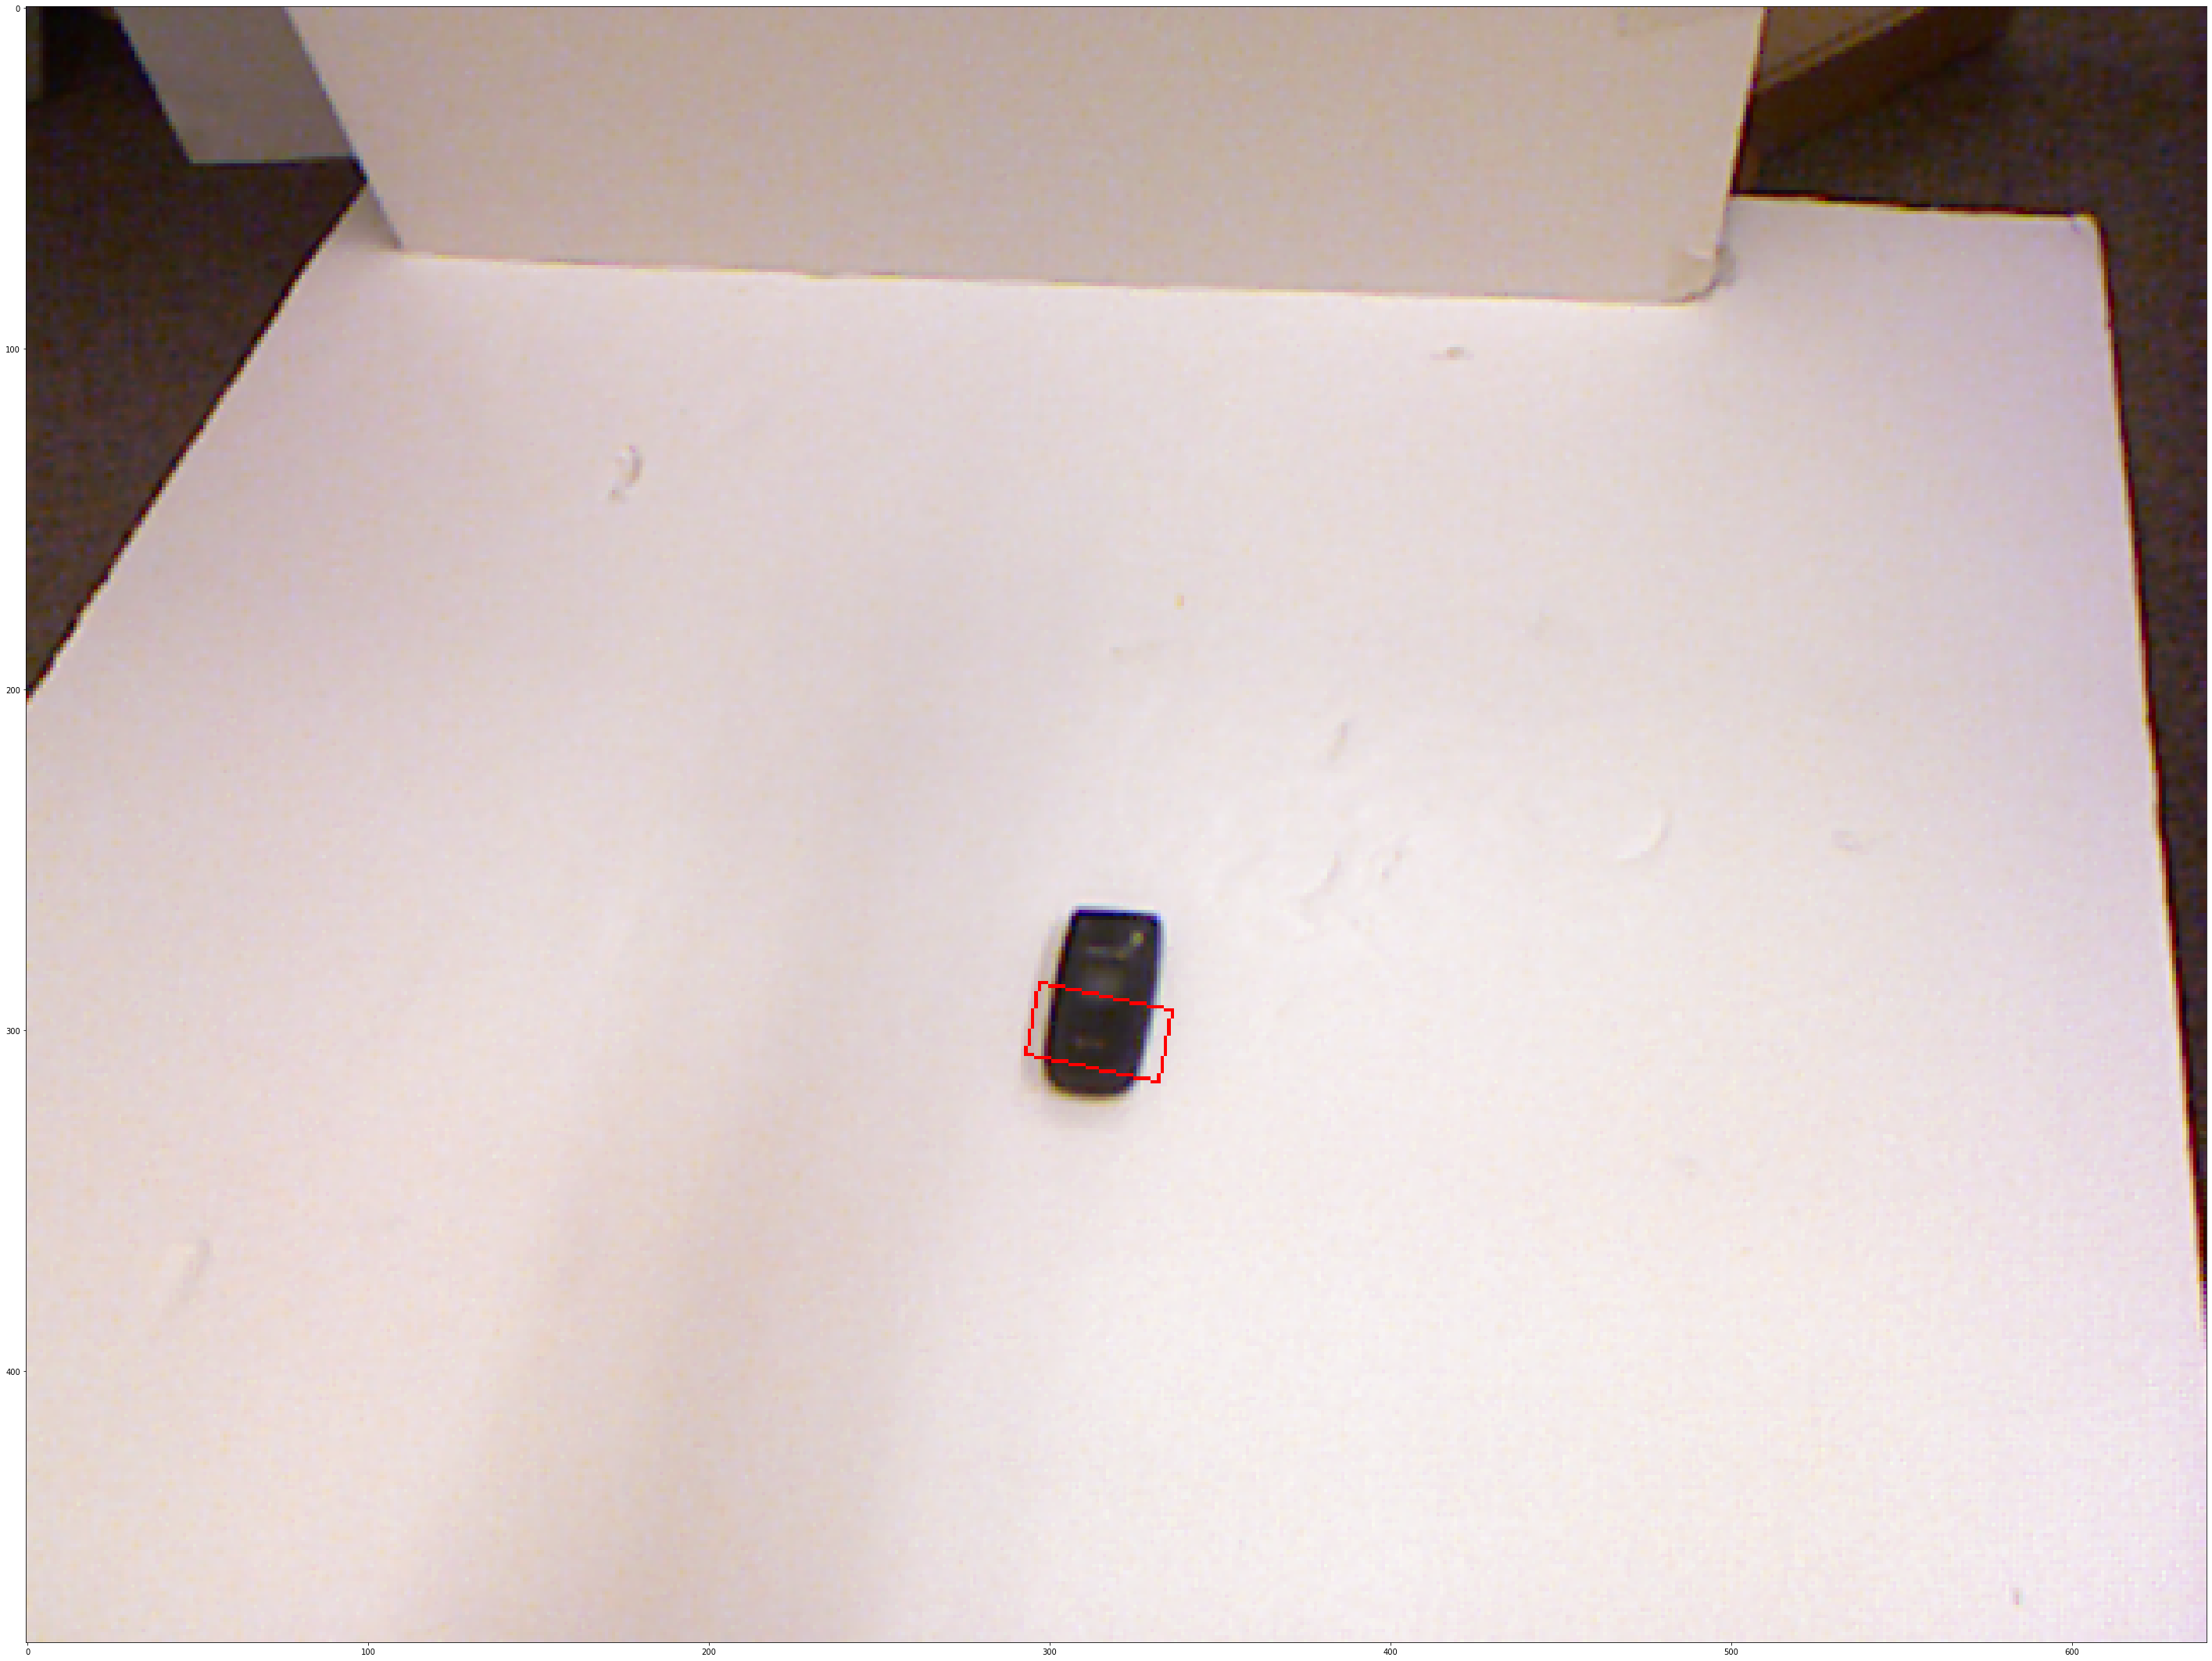

In [50]:
# to test the transformer

import random

numpy.random.seed(0)

random.seed(0)

parameters = {
    "final_dimensions" : (256, 256),

    "default_output" : True
}

directory_name = generate_list_of_images()

sample_file = directory_name[200]

open_image, tag = access_image_tag(sample_file)

display_image_tag(open_image,tag)





tensor([115.2000, 145.4779, 108.4000, 148.2667, 110.8000, 158.9333, 117.6000,
        156.1445])


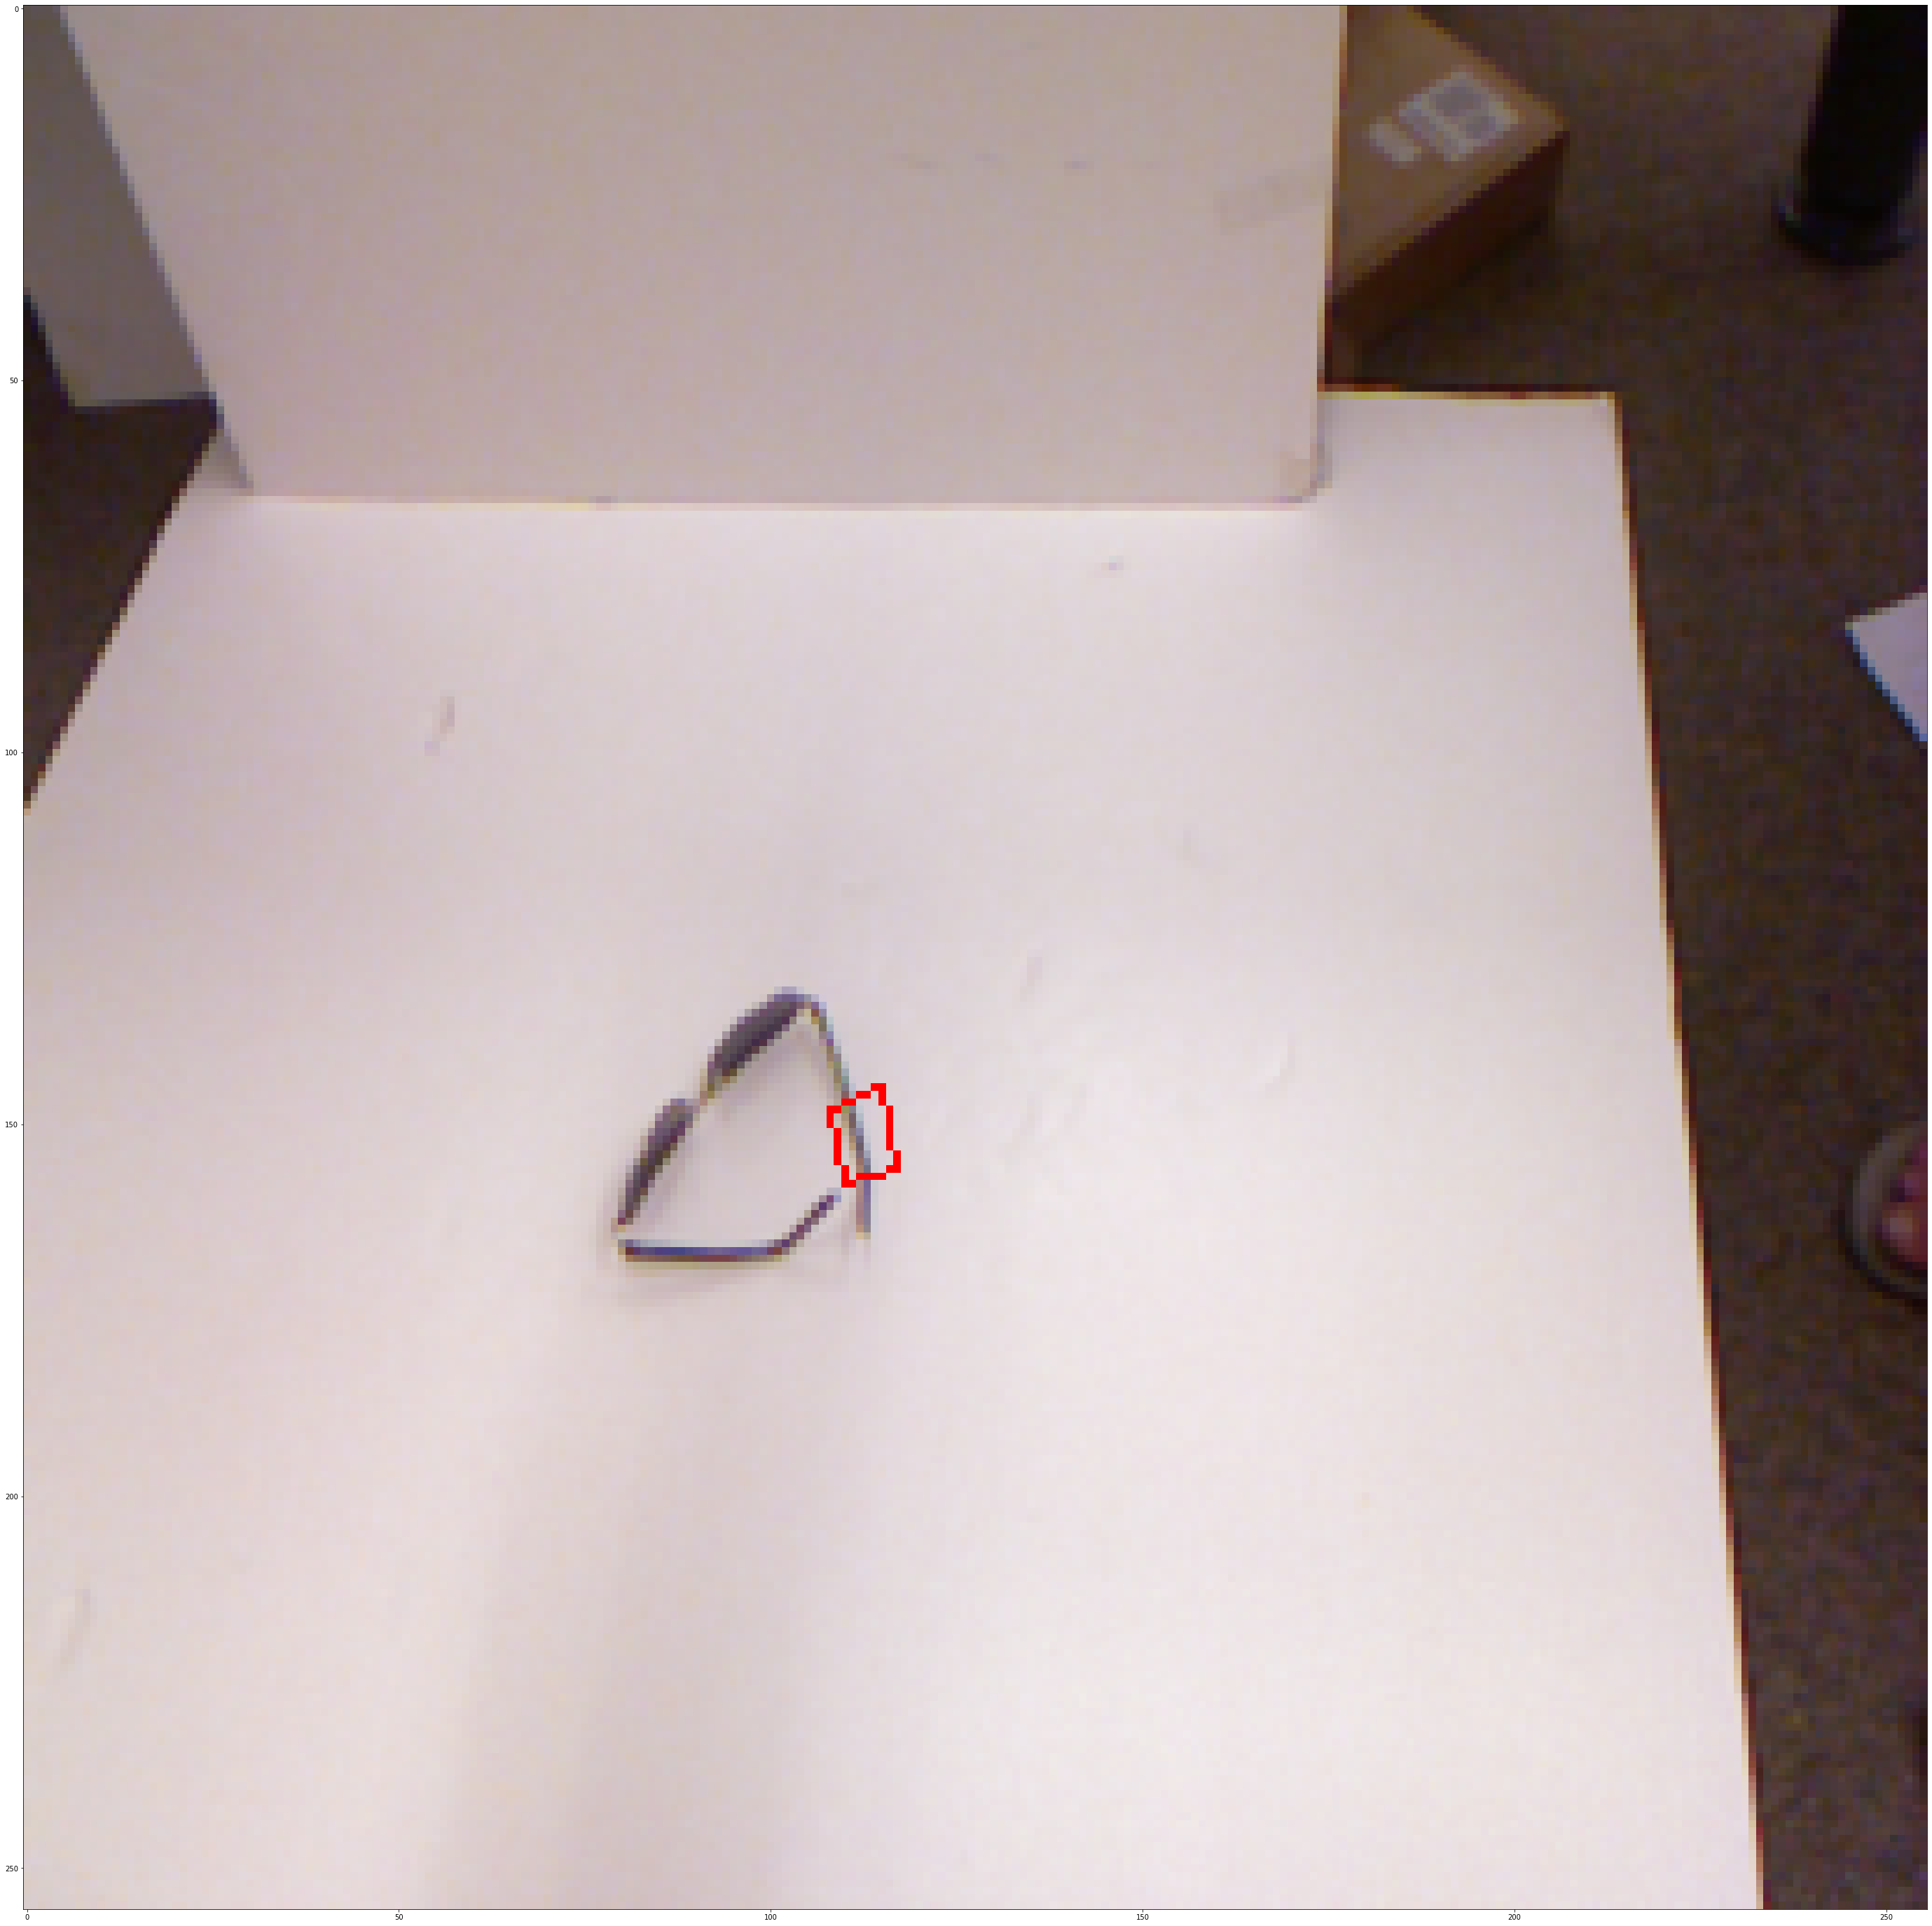

In [14]:
transformed_images,transformed_tag=image_tensor_transformer(open_image, torch.tensor(tag).view(-1,2),parameters)

print(transformed_tag)

transformed_tag = torch.squeeze(transformed_tag.view(1,-1)).tolist()

display_image_tag(torchvision.transforms.functional.to_pil_image(transformed_images),transformed_tag)

In [15]:
tensor_trans_parameters_2train={

    "final_dimensions" : (256, 256),

    "default_output" : True
}


tensor_trans_parameters_4validation={

    "final_dimensions" : (256, 256), 
    
    "default_output" : False
}

In [16]:

train_dataset = dataset(address_dataset,image_tensor_transformer,tensor_trans_parameters_2train)

validate_dataset = dataset(address_dataset,image_tensor_transformer,tensor_trans_parameters_4validation)

from sklearn.model_selection import ShuffleSplit

ssplit = ShuffleSplit(n_splits=1, test_size=0.3, random_state=0)

indices=range(len(train_dataset))

for train_index, val_index in ssplit.split(indices):

    print(len(train_index))
    
    print(len(val_index))  

619
----------
266


In [17]:
from torch.utils.data import Subset

train_dataset = Subset(train_dataset,train_index)

print(len(train_dataset))

validate_dataset = Subset(validate_dataset,val_index)

print(len(validate_dataset))

619
266


In [18]:

import matplotlib.pyplot 

import numpy 

%matplotlib inline

# fix random seed
numpy.random.seed(0)

def show(open_image,tag=None):

    numpy_image = open_image.numpy().transpose((1,2,0))

    matplotlib.pylab.imshow(numpy_image)

    if tag is not None:

        tag = tag.view(-1,2)

        for coordinate in tag:

            x,y= coordinate
            
            matplotlib.pylab.plot(x,y,'b+',markersize=10)

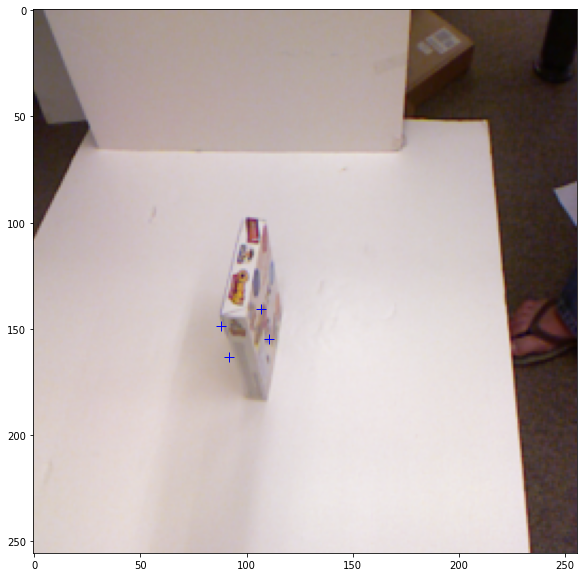

In [19]:

matplotlib.pylab.figure(figsize=(10,10))

for open_image,tag in train_dataset:

    show(open_image,tag)
    
    break

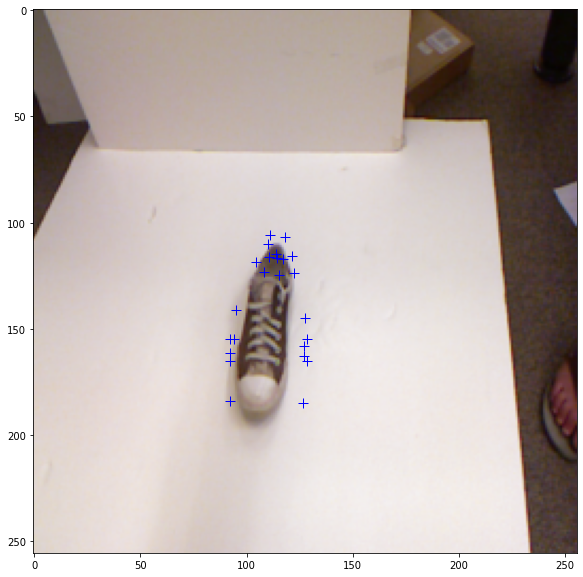

In [20]:
matplotlib.pylab.figure(figsize=(10,10))

for open_image,tag in validate_dataset:

    show(open_image,tag)
    
    break

In [21]:
from torch.utils.data import DataLoader

train_dataload = DataLoader(train_dataset, batch_size=64, shuffle=True)

validate_dataload = DataLoader(validate_dataset, batch_size=266, shuffle=False, collate_fn=collate_fn)

In [22]:
for rand_image, rand_tag in train_dataload:

    print(rand_image.shape,rand_image.dtype)

    print(rand_tag.shape)
    
    break

torch.Size([64, 3, 256, 256]) torch.float32
torch.Size([64, 8])


In [23]:
for open_image, tag in validate_dataload:

    print(tag.shape)
    
    break

torch.Size([1554, 9])


In [24]:
import torch.nn 

import torch.nn.functional 


In [25]:
class Net(torch.nn.Module):

    def __init__(self, parameters):

        super(Net, self).__init__()
    
    def forward(self, x):
        
        return x

In [26]:
def __init__(self, parameters):

    super(Net, self).__init__()

    C_in,H_in,W_in=parameters["input_shape"]

    init_f=parameters["initial_filters"] 

    num_outputs=parameters["num_outputs"] 

    self.convolution_first = torch.nn.Conv2d(C_in, init_f, kernel_size=3, stride=2, padding=1)

    self.convolution_second = torch.nn.Conv2d(init_f+C_in, 2*init_f, kernel_size=3, stride=1, padding=1)

    self.convolution_third = torch.nn.Conv2d(3*init_f+C_in, 4*init_f, kernel_size=3, padding=1)

    self.convolution_fourth = torch.nn.Conv2d(7*init_f+C_in, 8*init_f, kernel_size=3, padding=1)

    self.convolution_fifth = torch.nn.Conv2d(15*init_f+C_in, 16*init_f, kernel_size=3, padding=1)
    
    self.fc1 = torch.nn.Linear(16*init_f, num_outputs)

In [27]:
def forward(self, x):
    identity=torch.nn.functional.avg_pool2d(x,4,4)

    x = torch.nn.functional.relu(self.convolution_first(x))

    x = torch.nn.functional.max_pool2d(x, 2, 2)

    x = torch.cat((x, identity), dim=1)

    identity=torch.nn.functional.avg_pool2d(x,2,2)

    x = torch.nn.functional.relu(self.convolution_second(x))

    x = torch.nn.functional.max_pool2d(x, 2, 2)

    x = torch.cat((x, identity), dim=1)




    identity=torch.nn.functional.avg_pool2d(x,2,2)

    x = torch.nn.functional.relu(self.convolution_third(x))

    x = torch.nn.functional.max_pool2d(x, 2, 2)

    x = torch.cat((x, identity), dim=1)


    
    identity=torch.nn.functional.avg_pool2d(x,2,2)

    x = torch.nn.functional.relu(self.convolution_fourth(x))

    x = torch.nn.functional.max_pool2d(x, 2, 2)

    x = torch.cat((x, identity), dim=1)

    x = torch.nn.functional.relu(self.convolution_fifth(x))

    x=torch.nn.functional.adaptive_avg_pool2d(x,1)

    x = x.reshape(x.size(0), -1)

    x = self.fc1(x)
    
    return x

In [28]:
Net.__init__=__init__

Net.forward=forward

In [29]:
params_model={
        "input_shape": (3,256,256),

        "initial_filters": 16, 
        
        "num_outputs": 5,
            }

model = Net(params_model)

In [30]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = model.to(device)

In [31]:
print(model)

Net(
  (convolution_first): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (convolution_second): Conv2d(19, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (convolution_third): Conv2d(51, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (convolution_fourth): Conv2d(115, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (convolution_fifth): Conv2d(243, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=256, out_features=5, bias=True)
)


In [32]:
# transform function 
def list_of_coordinates_to_grasps(list_of_coordinates):

    # convert list of coordinates to grasp representation -> tensor([x, y, theta, h, w])
    x = list_of_coordinates[:,0] + (list_of_coordinates[:,4] - list_of_coordinates[:,0])/2

    y = list_of_coordinates[:,1] + (list_of_coordinates[:,5] - list_of_coordinates[:,1])/2 

    theta = torch.atan((list_of_coordinates[:,3] -list_of_coordinates[:,1]) / (list_of_coordinates[:,2] -list_of_coordinates[:,0]))

    w = torch.sqrt(torch.pow((list_of_coordinates[:,2] -list_of_coordinates[:,0]), 2) + torch.pow((list_of_coordinates[:,3] -list_of_coordinates[:,1]), 2))

    
    h = torch.sqrt(torch.pow((list_of_coordinates[:,6] -list_of_coordinates[:,0]), 2) + torch.pow((list_of_coordinates[:,7] -list_of_coordinates[:,1]), 2))
    grasps = torch.stack((x, y, theta, h, w), 1)
    return grasps

def grasps_to_list_of_coordinates(grasps):
    # convert grasp representation to list of coordinates
    x = grasps[:,0]

    y = grasps[:,1]

    theta = grasps[:,2]

    h = grasps[:,3]

    w = grasps[:,4]

    x1 = x -w/2*torch.cos(theta) +h/2*torch.sin(theta)

    y1 = y -w/2*torch.sin(theta) -h/2*torch.cos(theta)

    x2 = x +w/2*torch.cos(theta) +h/2*torch.sin(theta)

    y2 = y +w/2*torch.sin(theta) -h/2*torch.cos(theta)

    x3 = x +w/2*torch.cos(theta) -h/2*torch.sin(theta)

    y3 = y +w/2*torch.sin(theta) +h/2*torch.cos(theta)
    x4 = x -w/2*torch.cos(theta) -h/2*torch.sin(theta)

    y4 = y -w/2*torch.sin(theta) +h/2*torch.cos(theta)
    
    list_of_coordinates = torch.stack((x1, y1, x2, y2, x3, y3, x4, y4), 1)
    return list_of_coordinates
    

In [33]:
# transform function testing

for open_image, tag in train_dataload:
    print(tag)
    print(tag.shape)
    
    grasps = list_of_coordinates_to_grasps(tag)
    print(grasps)
    print(grasps.shape)
    
    x = grasps_to_list_of_coordinates(grasps)
    print(x)
    print(x.shape)
    
    y = list_of_coordinates_to_grasps(x)
    print(y)
    print(y.shape)
    
    
    break

tensor([[115.2000, 139.7461, 145.2000, 132.2795, 143.2000, 117.3333, 113.2000,
         124.8000],
        [136.0000, 189.4507, 145.6000, 179.2000, 139.2000, 168.5333, 129.6000,
         178.7840],
        [139.2000, 137.5589, 137.6000, 147.2000, 145.6000, 149.3333, 147.2000,
         139.6923],
        [115.2000, 129.5419, 140.8000, 137.0085, 144.0000, 117.3333, 118.4000,
         109.8667],
        [117.2000, 170.5643, 121.2000, 184.5333, 127.6000, 181.3333, 123.6000,
         167.3643],
        [119.2000, 138.8549, 117.2000, 150.4000, 126.8000, 153.6000, 128.8000,
         142.0549],
        [110.8000, 122.5061, 156.4000, 138.5061, 161.6000, 111.4667, 116.0000,
          95.4667],
        [148.4000, 156.8000, 120.0000, 156.8000, 120.0000, 144.0000, 148.4000,
         144.0000],
        [132.4000, 146.4709, 121.2000, 150.9333, 118.8000, 140.2667, 130.0000,
         135.8043],
        [101.2000, 169.0139, 117.6000, 176.0000, 114.0000, 190.9333,  97.6000,
         183.9472],
        [1

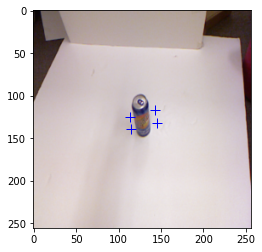

In [34]:
show(open_image[0], tag[0])

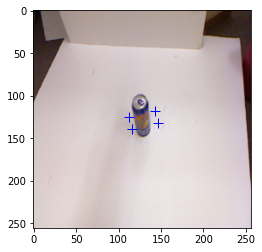

In [35]:
show(open_image[0], x[0])

In [36]:
import torchvision
from shapely.geometry import Polygon
from math import pi 

def box_iou(bbox_value, bbox_target):
    p1 = Polygon(bbox_value.view(-1,2).tolist())
    p2 = Polygon(bbox_target.view(-1,2).tolist())
    iou = p1.intersection(p2).area / (p1.area +p2.area -p1.intersection(p2).area) 
    return iou



def metrics_batch(output, target):
    pre_list_of_coordinates = grasps_to_list_of_coordinates(output)
    count = 0
    if target.shape[1] == 8:

        target_grasps = list_of_coordinates_to_grasps(target)

        for alpha in range(len(output)):  

            iou = box_iou(pre_list_of_coordinates[alpha], target[alpha])
            pre_theta = output[alpha][2]

            target_theta = target_grasps[alpha][2]

            angle_diff = torch.abs(pre_theta - target_theta)*180/pi
            if angle_diff < 30 and iou > 0.25:
                count = count + 1
    else:
        good = [0 for alpha in range(len(output))]

        all_grasps = list_of_coordinates_to_grasps(target[:, 1:])

        for alpha in range(len(target)):

            index = target[alpha][0].int()

            if good[index] == 1:
                continue
            iou = box_iou(pre_list_of_coordinates[index], target[alpha][1:])

            pre_theta = output[index][2]
            target_theta = all_grasps[alpha][2]

            angle_diff = torch.abs(pre_theta - target_theta)*180/pi

            if angle_diff < 30 and iou > 0.25:
                
                good[index] = 1
                
        for flag in good:
            if flag == 1:
                count = count + 1
        
    return count

In [37]:
for open_image, tag in train_dataload:

    grasps = list_of_coordinates_to_grasps(tag)

    list_of_coordinates = grasps_to_list_of_coordinates(grasps)

    print(box_iou(tag[0], list_of_coordinates[0]))   
    
    print(metrics_batch(grasps, tag))
    break

0.9926465995570042
64


In [38]:
for open_image, tag in validate_dataload:

    list_of_coordinates = torch.rand(open_image.shape[0], 8)

    for box in tag:

        list_of_coordinates[box[0].int()] = box[1:]

    grasps = list_of_coordinates_to_grasps(list_of_coordinates)

    list_of_coordinates_new = grasps_to_list_of_coordinates(grasps)
    
    print(box_iou(list_of_coordinates_new[0], list_of_coordinates[0]))   
    print(metrics_batch(grasps, tag))
    break

0.9953954354800537
266


In [39]:

def loss_in_training_batch(output,targets, loss_parameters, value_optimization=None):  
    mean_squared_error_loss = loss_parameters["mean_squared_error_loss"]
    gama = loss_parameters["gama"]
    grasps = list_of_coordinates_to_grasps(targets)
    loss_x =mean_squared_error_loss(output[:,0], grasps[:,0])
    loss_y =mean_squared_error_loss(output[:,1], grasps[:,1])
    loss_h =mean_squared_error_loss(output[:,3], grasps[:,3])
    loss_w =mean_squared_error_loss(output[:,4], grasps[:,4])
    loss_theta = mean_squared_error_loss(output[:,2], grasps[:,2])
    var_loss = loss_x + loss_y + loss_h + loss_w + gama*loss_theta
        
    #return performance metric
    value_metric = metrics_batch(output,targets)
    
    if value_optimization is not None:
        value_optimization.zero_grad()
        var_loss.backward()
        value_optimization.step()

    return var_loss.item(), value_metric

In [40]:
a = torch.tensor([[1.0,3], [1, 1, ]])
a.mean()

tensor(1.5000)

In [41]:
def validation_loss_batch(output,targets, loss_parameters):  
    var_loss = 0.0
    gama = loss_parameters["gama"]
    
    for index, grasp in enumerate(output):
        target = [g[1:] for g in targets if g[0].int() == index]
        target = torch.stack(target)
        target_grasps = list_of_coordinates_to_grasps(target)
        loss_x = torch.pow((target_grasps[:,0] - grasp[0]), 2).mean()
        loss_y = torch.pow((target_grasps[:,1] - grasp[1]), 2).mean()
        loss_h = torch.pow((target_grasps[:,3] - grasp[3]), 2).mean()
        loss_w = torch.pow((target_grasps[:,4] - grasp[4]), 2).mean()
        loss_theta = torch.pow((target_grasps[:,2] - grasp[2]), 2).mean()
        var_loss = var_loss + loss_x + loss_y + loss_h + loss_w + gama*loss_theta
        
    # performance metric
    value_metric = metrics_batch(output,targets)
    

    return var_loss, value_metric

In [42]:
def epoach_loss_func(model,loss_parameters, dataset_dl, sanity_tst=False, value_optimization=None, training=True):
    current_loss=0.0
    current_metric=0.0
    data_length=len(dataset_dl.dataset)

    for value_x, value_y in dataset_dl:
        value_y=value_y.to(device)
        
        # final output of model
        model_output=model(value_x.to(device))
        
        # loss per batch
        if training:
            value_loss,value_metric = loss_in_training_batch(model_output, value_y, loss_parameters, value_optimization)
        else:
            value_loss,value_metric = validation_loss_batch(model_output, value_y, loss_parameters)
        
        # update current loss
        current_loss+=value_loss
        
        # update current metric
        current_metric += value_metric
        
        if sanity_tst:
            break

    # average value of loss
    var_loss = current_loss/float(data_length)
    
    # average value of metric
    metric = current_metric/float(data_length)
    
    return var_loss, metric

In [43]:
from torch import optim
value_optimization = optim.Adam(model.parameters(), lr=3e-4)

def get_learning_rate(value_optimization):
    for param_group in value_optimization.param_groups:
        return param_group['lr']

from torch.optim.lr_scheduler import ReduceLROnPlateau
learning_rate_scheduler = ReduceLROnPlateau(value_optimization, mode='min',factor=0.5, patience=20,verbose=1)



In [44]:
# The training loop
import copy
def validation_ntraining(model, parameters):

    number_of_epochs=parameters["number_of_epochs"]

    loss_parameters=parameters["loss_parameters"]

    value_optimization=parameters["val_optimizer"]

    train_dataload=parameters["train_dataload"]

    validate_dataload=parameters["validate_dataload"]

    sanity_tst=parameters["sanity_tst"]

    lr_scheduler=parameters["lr_scheduler"]
    
    address_of_weights=parameters["address_of_weights"]
    
    # history of loss values in each epoch
    history_of_loss={
        "train": [],
        "val": [],
    }
    
    # histroy of metric values in each epoch
    history_of_metric={
        "train": [],
        "val": [],
    }    
    
    
    # a deep copy of weights for the best performing model
    weights_of_best_model = copy.deepcopy(model.state_dict())
    
    # initialising  best loss to a large value
    value_best_loss=float('inf')    
    
    for each_epoch in range(number_of_epochs):
        # get current learning rate
        current_learning_rate=get_learning_rate(value_optimization)
        print('Epoch {}/{}, current learning_rate={}'.format(each_epoch, number_of_epochs - 1, current_learning_rate))   

        # training the model
        model.train()
        train_loss, train_metric=epoach_loss_func(model,loss_parameters,train_dataload,sanity_tst,value_optimization)

        # collection of  loss  and metric for training dataset
        history_of_loss["train"].append(train_loss)
        history_of_metric["train"].append(train_metric)
        
        # model evaluation
        model.eval()
        with torch.no_grad():
            val_loss, val_metric=epoach_loss_func(model,loss_parameters,validate_dataload,sanity_tst, training=False)
       
        # collect loss and metric for validation dataset
        history_of_loss["val"].append(val_loss)
        history_of_metric["val"].append(val_metric)   
        
        
        #save best model
        if val_loss < value_best_loss:
            value_best_loss = val_loss
            weights_of_best_model = copy.deepcopy(model.state_dict())
            
            # saving weights in local file

            torch.save(model.state_dict(), address_of_weights)
            print("Copied best model weights!")
            
        # Schedule learning rate

        lr_scheduler.step(val_loss)
        if current_learning_rate != get_learning_rate(value_optimization):
            print("Loading best model weights!")
            model.load_state_dict(weights_of_best_model) 
            

        print("train loss: %.6f, accuracy: %.2f" %(train_loss,100*train_metric))
        print("val loss: %.6f, accuracy: %.2f" %(val_loss,100*val_metric))
        print("-"*10) 
        

    # Accessing best model weights
    model.load_state_dict(weights_of_best_model)
    return model, history_of_loss, history_of_metric

In [45]:
value_optimization = optim.Adam( model.parameters(), lr=1e-3)

lr_scheduler = ReduceLROnPlateau(value_optimization, mode='min',factor=0.5, patience=20,verbose=1)

address_to_model= "../models/"

if not os.path.exists(address_to_model):
    
        os.mkdir(address_to_model)

mean_squared_error_loss = torch.nn.MSELoss(reduction="sum")

loss_parameters={
    "mean_squared_error_loss": mean_squared_error_loss,

    "gama": 5.0,
}

training_parameters={
    "number_of_epochs": 500,

    "val_optimizer": value_optimization,

    "loss_parameters": loss_parameters,

    "train_dataload": train_dataload,

    "validate_dataload": validate_dataload,

    "sanity_tst": True,

    "lr_scheduler": lr_scheduler,

    "address_of_weights": address_to_model+"weights.pt",
}

model,loss_hist, history_of_metric = validation_ntraining(model,training_parameters)

Epoch 0/499, current learning_rate=0.001
Copied best model weights!
train loss: 3924.512520, accuracy: 0.00
val loss: 37036.714844, accuracy: 0.00
----------
Epoch 1/499, current learning_rate=0.001
Copied best model weights!
train loss: 4010.518982, accuracy: 0.00
val loss: 36574.859375, accuracy: 0.00
----------
Epoch 2/499, current learning_rate=0.001
Copied best model weights!
train loss: 3770.485460, accuracy: 0.00
val loss: 35661.277344, accuracy: 0.00
----------
Epoch 3/499, current learning_rate=0.001
Copied best model weights!
train loss: 3664.120355, accuracy: 0.00
val loss: 34029.949219, accuracy: 0.00
----------
Epoch 4/499, current learning_rate=0.001
Copied best model weights!
train loss: 3620.387318, accuracy: 0.00
val loss: 31352.791016, accuracy: 0.00
----------
Epoch 5/499, current learning_rate=0.001
Copied best model weights!
train loss: 3269.949313, accuracy: 0.00
val loss: 27206.679688, accuracy: 0.00
----------
Epoch 6/499, current learning_rate=0.001
Copied best

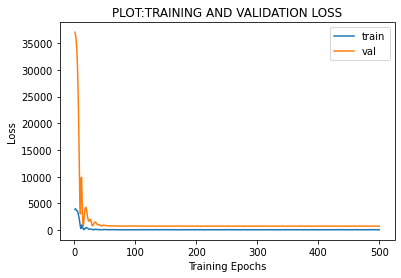

In [46]:
# Training And Validation Track 

number_of_epochs=training_parameters["number_of_epochs"]

# PLOT:TRAINING AND VALIDATION ACCURACY
matplotlib.pylab.title("PLOT:TRAINING AND VALIDATION LOSS")

matplotlib.pylab.plot(range(1,number_of_epochs+1),loss_hist["train"],label="train")

matplotlib.pylab.plot(range(1,number_of_epochs+1),loss_hist["val"],label="val")

matplotlib.pylab.ylabel("Loss")

matplotlib.pylab.xlabel("Training Epochs")

matplotlib.pylab.legend()

matplotlib.pylab.show()

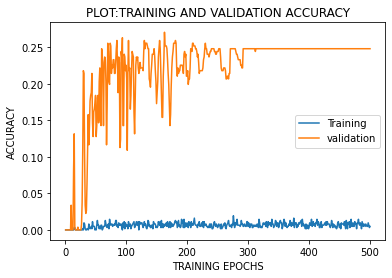

In [47]:
#PLOT FOR TRAINING AND VALIDATION ACCURACY

matplotlib.pylab.title("PLOT:TRAINING AND VALIDATION ACCURACY")

matplotlib.pylab.plot(range(1,number_of_epochs+1),history_of_metric["train"],label="Training")

matplotlib.pylab.plot(range(1,number_of_epochs+1),history_of_metric["val"],label="validation")
matplotlib.pylab.ylabel("ACCURACY")

matplotlib.pylab.xlabel("TRAINING EPOCHS")

matplotlib.pylab.legend()

matplotlib.pylab.show()